In [ ]:
!pip install torch transformers pandas
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import confusion_matrix
import os

In [ ]:
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/codebert-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Mounted at /content/drive


In [ ]:
# file_path_05 = '/content/drive/My Drive/Dataset/NLP/05_List_11_dedup.csv'
# file_path_08 = '/content/drive/My Drive/Dataset/NLP/08_Dict_22_dedup.csv'
file_path_human = '/content/drive/My Drive/Dataset/NLP/submissions.csv'
file_path_ai = '/content/drive/My Drive/Dataset/NLP/generated_submissions.csv'

In [ ]:
os.listdir('/content/drive/My Drive/Dataset/NLP')

['05_List_11_dedup.csv',
 '08_Dict_22_dedup.csv',
 'generated_submissions.csv',
 'submissions.csv']

In [ ]:
# df_05 = pd.read_csv(file_path_05)
# df_08 = pd.read_csv(file_path_08)
df_human = pd.read_csv(file_path_human)
df_ai = pd.read_csv(file_path_ai)

In [ ]:
df_human = df_human[df_human['type'] == 'human']
df_human

,id,author,problem_id,code,submission_id,score,time,type
0,1255109,6330139021,05_List_11,x = input()\na = [str(i) for i in range(10)]\n...,1255109,100.0,over 4 years ago,human
1,1257085,6330004021,05_List_11,"n=input()\nans=''\ndg=['0','1','2','3','4','5'...",1257085,100.0,over 4 years ago,human
2,1255424,6330015921,05_List_11,"a=input()\nb=[]\nc=""""\nfor ch in a:\n if""0""...",1255424,100.0,over 4 years ago,human
3,1047529,6230080521,05_List_11,"a=input().strip()\nn=['0','1','2','3','4','5',...",1047529,100.0,over 5 years ago,human
4,1253956,6231007021,05_List_11,"dg = ['0','1','2','3','4','5','6','7','8','9']...",1253956,100.0,over 4 years ago,human
...,...,...,...,...,...,...,...,...
5760,1189023,6230502021,08_Dict_22,n=int(input())\nprice={}\nfor i in range(n) :\...,1189023,100.0,almost 5 years ago,human
5761,1177236,6230557621,08_Dict_22,N =int(input())\ntag={};order=[];earn=0.0;ot={...,1177236,100.0,almost 5 years ago,human
5762,1743499,6532038921,08_Dict_22,n = int(input())\n\ndic = {}\n\nfor i in range...,1743499,100.0,about 2 years ago,human
5763,1585977,6430274121,08_Dict_22,ice = {}\nN = int(input())\nfor i in range (N)...,1585977,100.0,almost 3 years ago,human


In [ ]:
df_ai

,id,author,problem_id,code,submission_id,score,time,type
0,NaN,gemini-2.0-flash-001,05_List_11,s = input()\nmissing = []\nfor i in range(10):...,NaN,NaN,2025-04-28 22:43:32.473922,generated
1,NaN,gemini-2.0-flash-001,05_List_11,s = input()\nmissing = []\nfor i in range(10):...,NaN,NaN,2025-04-28 22:43:52.958356,generated
2,NaN,gemini-2.0-flash-001,05_List_11,"def find_missing_digits(input_string):\n """"""\...",NaN,NaN,2025-04-28 22:44:15.626408,generated
3,NaN,gemini-2.0-flash-001,05_List_11,s = input()\nmissing = []\nfor i in range(10):...,NaN,NaN,2025-04-28 22:44:16.667282,generated
4,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n ice_cr...,NaN,NaN,2025-04-28 22:44:22.043739,generated
...,...,...,...,...,...,...,...,...
435,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n ice_cr...,NaN,NaN,2025-03-21 19:43:16.459842,generated
436,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n prices...,NaN,NaN,2025-03-21 19:43:18.512018,generated
437,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n prices...,NaN,NaN,2025-03-21 19:43:20.765874,generated
438,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n ice_cr...,NaN,NaN,2025-03-21 19:43:49.863853,generated


In [ ]:
df = pd.concat([df_human, df_ai], ignore_index=True)
df

,id,author,problem_id,code,submission_id,score,time,type
0,1255109.0,6330139021,05_List_11,x = input()\na = [str(i) for i in range(10)]\n...,1255109.0,100.0,over 4 years ago,human
1,1257085.0,6330004021,05_List_11,"n=input()\nans=''\ndg=['0','1','2','3','4','5'...",1257085.0,100.0,over 4 years ago,human
2,1255424.0,6330015921,05_List_11,"a=input()\nb=[]\nc=""""\nfor ch in a:\n if""0""...",1255424.0,100.0,over 4 years ago,human
3,1047529.0,6230080521,05_List_11,"a=input().strip()\nn=['0','1','2','3','4','5',...",1047529.0,100.0,over 5 years ago,human
4,1253956.0,6231007021,05_List_11,"dg = ['0','1','2','3','4','5','6','7','8','9']...",1253956.0,100.0,over 4 years ago,human
...,...,...,...,...,...,...,...,...
4482,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n ice_cr...,NaN,NaN,2025-03-21 19:43:16.459842,generated
4483,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n prices...,NaN,NaN,2025-03-21 19:43:18.512018,generated
4484,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n prices...,NaN,NaN,2025-03-21 19:43:20.765874,generated
4485,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n ice_cr...,NaN,NaN,2025-03-21 19:43:49.863853,generated


In [ ]:
type2int = {'human':0,'generated':1}
df['type'] = df['type'].map(type2int)
df

,id,author,problem_id,code,submission_id,score,time,type
0,1255109.0,6330139021,05_List_11,x = input()\na = [str(i) for i in range(10)]\n...,1255109.0,100.0,over 4 years ago,0
1,1257085.0,6330004021,05_List_11,"n=input()\nans=''\ndg=['0','1','2','3','4','5'...",1257085.0,100.0,over 4 years ago,0
2,1255424.0,6330015921,05_List_11,"a=input()\nb=[]\nc=""""\nfor ch in a:\n if""0""...",1255424.0,100.0,over 4 years ago,0
3,1047529.0,6230080521,05_List_11,"a=input().strip()\nn=['0','1','2','3','4','5',...",1047529.0,100.0,over 5 years ago,0
4,1253956.0,6231007021,05_List_11,"dg = ['0','1','2','3','4','5','6','7','8','9']...",1253956.0,100.0,over 4 years ago,0
...,...,...,...,...,...,...,...,...
4482,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n ice_cr...,NaN,NaN,2025-03-21 19:43:16.459842,1
4483,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n prices...,NaN,NaN,2025-03-21 19:43:18.512018,1
4484,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n prices...,NaN,NaN,2025-03-21 19:43:20.765874,1
4485,NaN,gemini-2.0-flash-001,08_Dict_22,def solve():\n n = int(input())\n ice_cr...,NaN,NaN,2025-03-21 19:43:49.863853,1


In [ ]:
class CodeDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=512):
        self.codes = df['code'].tolist()
        self.labels = df['type'].tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.codes)

    def __getitem__(self, index):
        code = self.codes[index]
        label = self.labels[index]

        inputs = self.tokenizer.encode_plus(
                code,
                padding='max_length',
                max_length=self.max_length,
                truncation=True
                )

        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']
        return {
            'input_ids': torch.tensor(input_ids, dtype=torch.long),
            'attention_mask': torch.tensor(attention_mask, dtype=torch.long),
            'labels': torch.tensor(label, dtype=torch.long)
            }

In [ ]:
df_train, df_test = train_test_split(df, stratify=df['type'], test_size=0.2, random_state=42)

In [ ]:
int(df_train['type'].sum())/df_train.shape[0]

0.09807745890220117

In [ ]:
int(df_test['type'].sum())/df_test.shape[0]

0.09799554565701558

In [ ]:
# Define the training dataset and dataloader
train_dataset = CodeDataset(df_train,tokenizer)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the testing dataset and dataloader
test_dataset = CodeDataset(df_test,tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=12,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    optim='adamw_torch',
    learning_rate=5e-5,
    save_total_limit=2,
    # metric_for_best_model='f1',
    # report_to='wandb',
    # push_to_hub=True,
    # hub_strategy='every_save',
    # hub_model_id=repository_id,
    # hub_token=HfFolder.get_token(),
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset
    # eval_dataset=test_dataset,
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: achiralin01 (lucass01) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.736600
20,0.662700
30,0.565900
40,0.398900
50,0.301000
60,0.318600
70,0.210600
80,0.137800
90,0.092400
100,0.042300


TrainOutput(global_step=1356, training_loss=0.02951077243493397, metrics={'train_runtime': 4033.7178, 'train_samples_per_second': 10.677, 'train_steps_per_second': 0.336, 'total_flos': 1.133166693224448e+16, 'train_loss': 0.02951077243493397, 'epoch': 12.0})

In [ ]:
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        y_true += labels.tolist()
        y_pred += predictions.tolist()

In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

       Human       1.00      1.00      1.00       810
     ChatGPT       1.00      1.00      1.00        88

    accuracy                           1.00       898
   macro avg       1.00      1.00      1.00       898
weighted avg       1.00      1.00      1.00       898



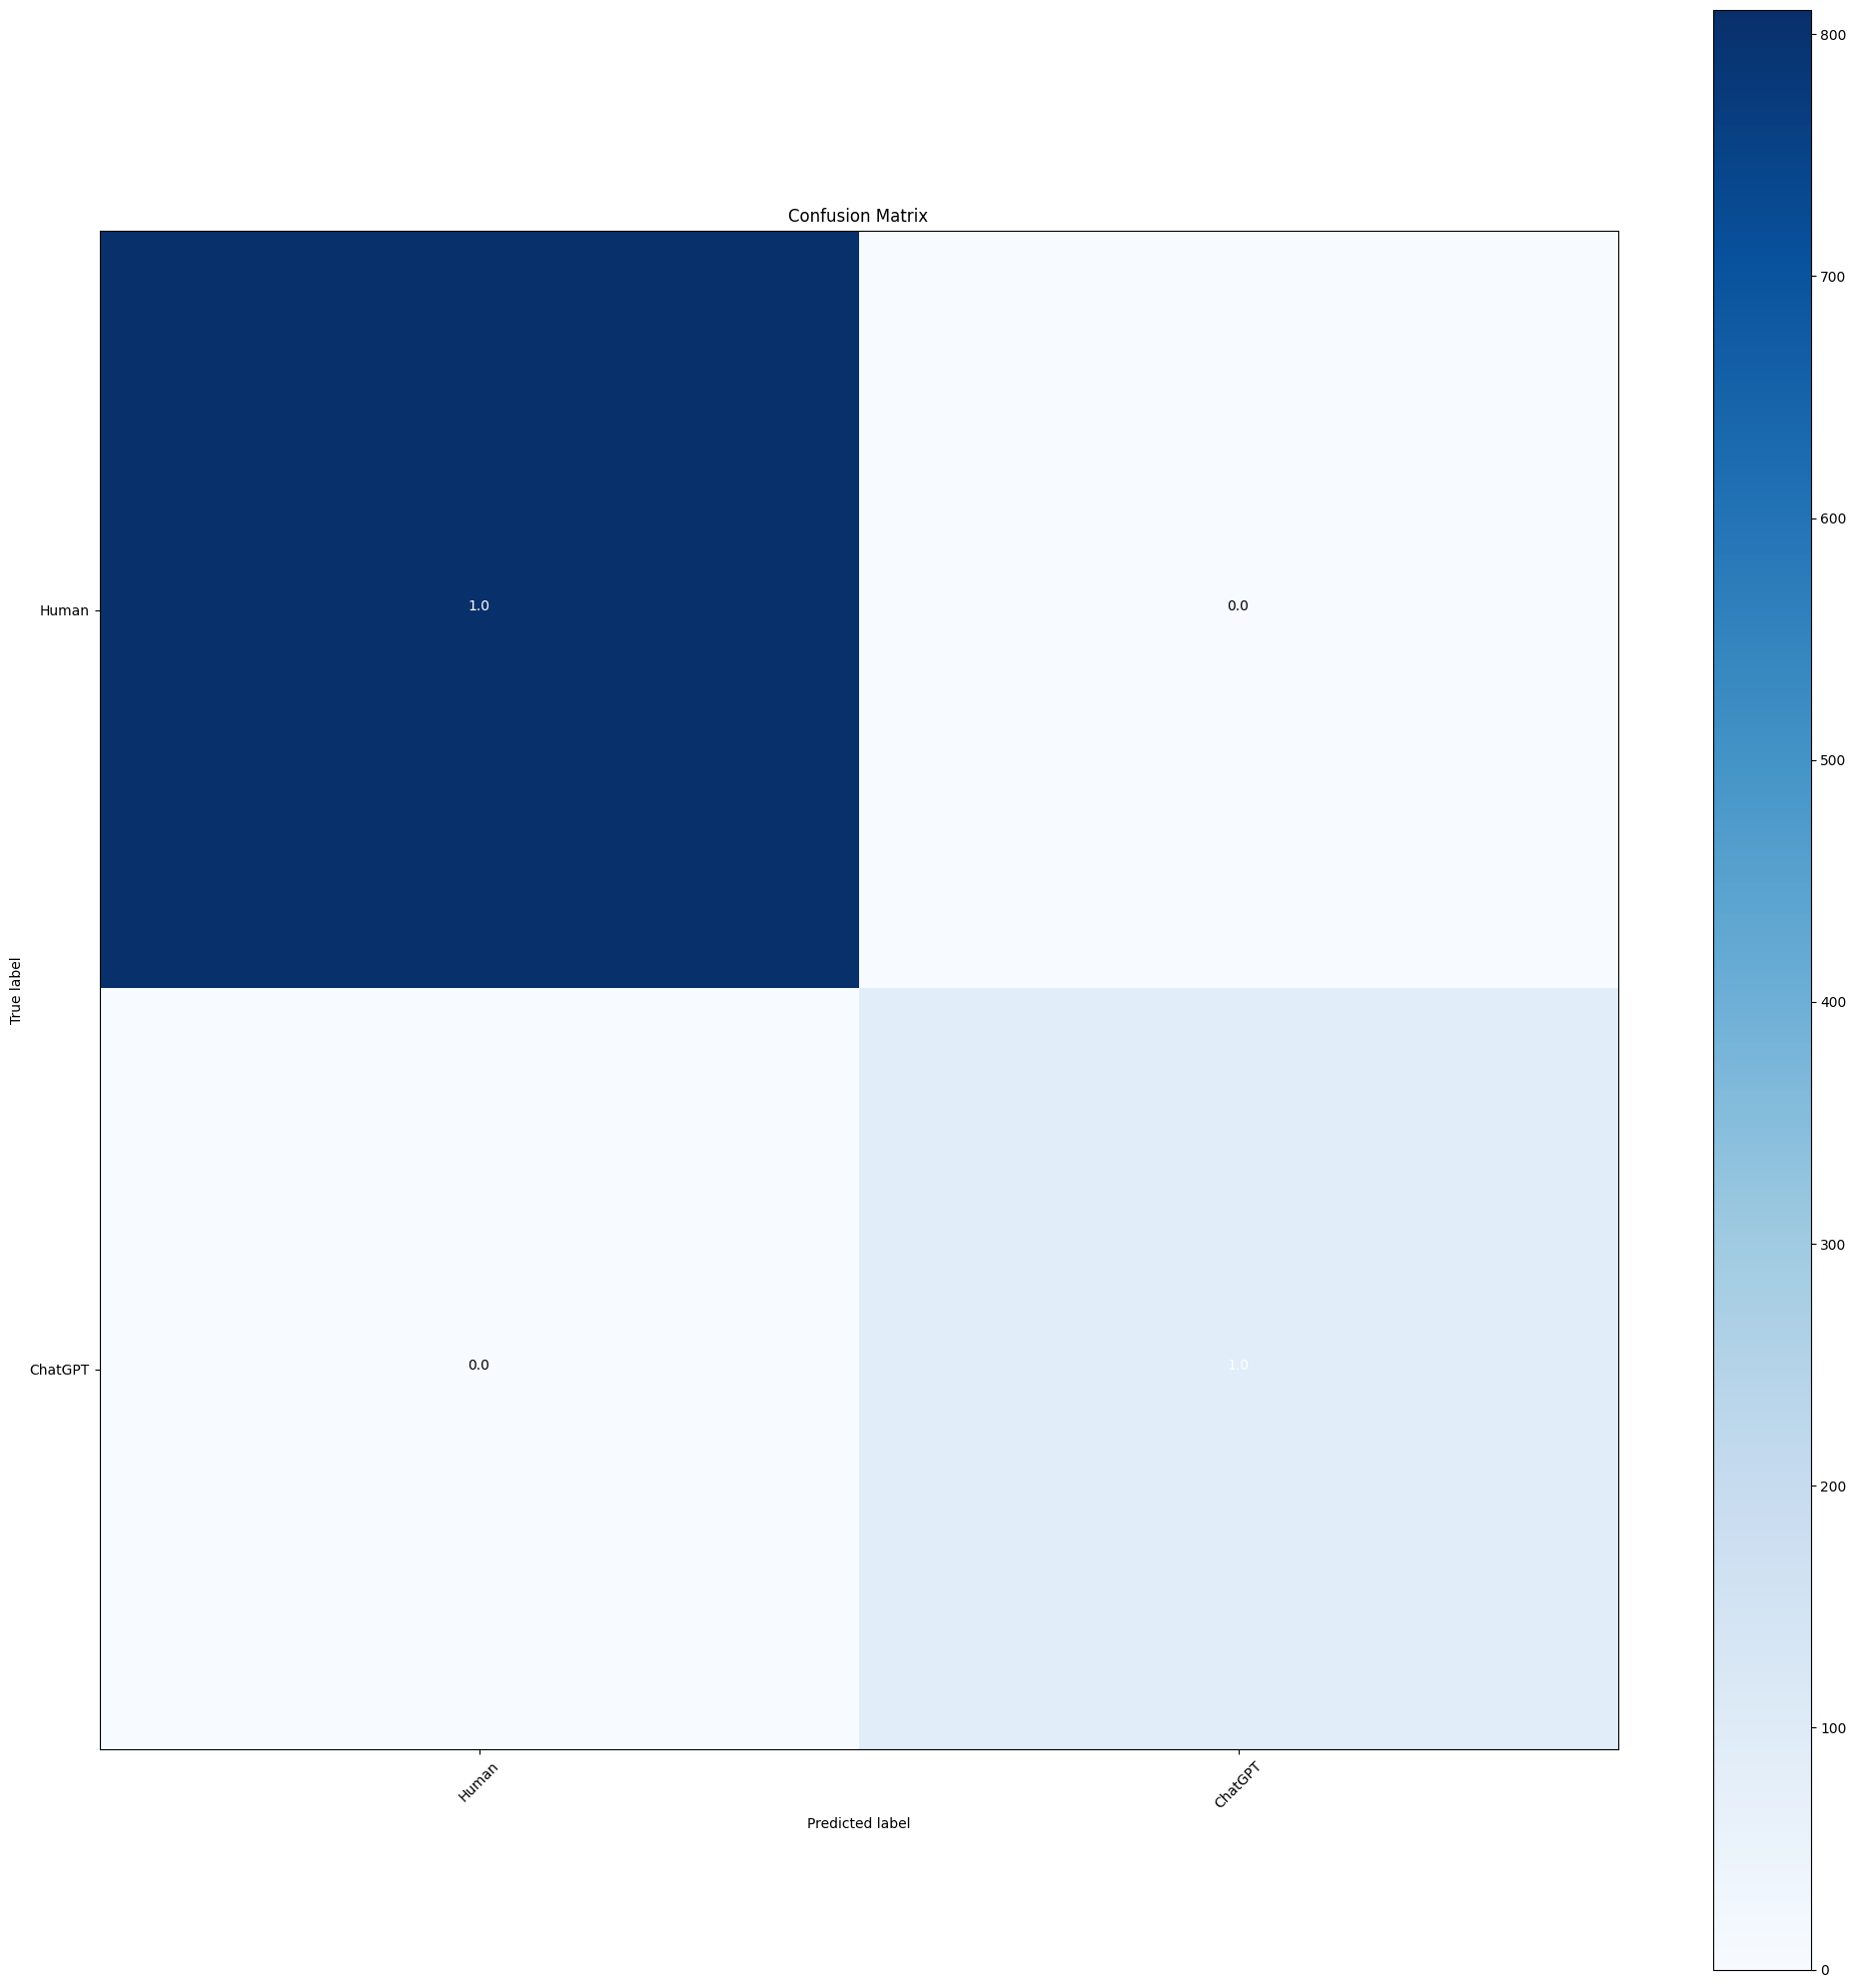

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['Human','ChatGPT']

print('Confusion Matrix')
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
# Print Classification Report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
model.save_pretrained('/content/drive/My Drive/Dataset/NLP/my_model/')
tokenizer.save_pretrained('/content/drive/My Drive/Dataset/NLP/my_model/')

('/content/drive/My Drive/Dataset/NLP/my_model/tokenizer_config.json',
 '/content/drive/My Drive/Dataset/NLP/my_model/special_tokens_map.json',
 '/content/drive/My Drive/Dataset/NLP/my_model/vocab.json',
 '/content/drive/My Drive/Dataset/NLP/my_model/merges.txt',
 '/content/drive/My Drive/Dataset/NLP/my_model/added_tokens.json',
 '/content/drive/My Drive/Dataset/NLP/my_model/tokenizer.json')